In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






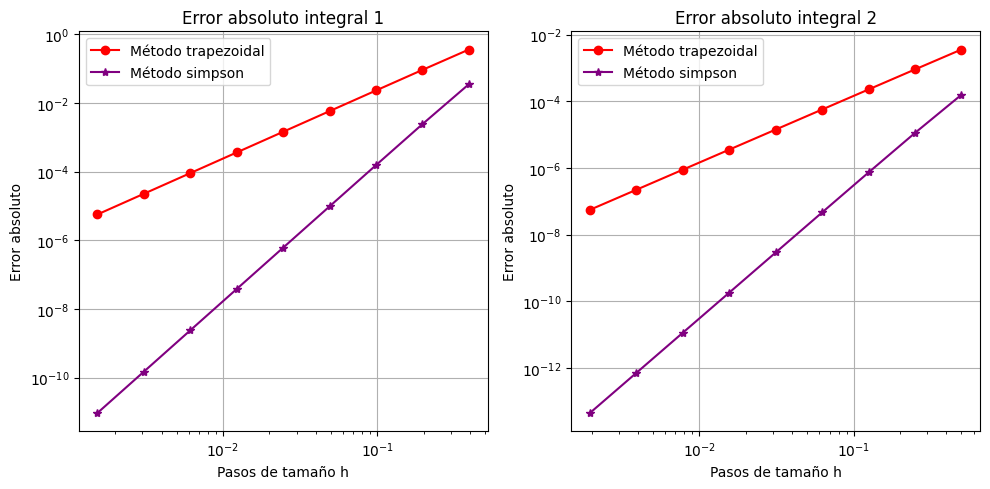

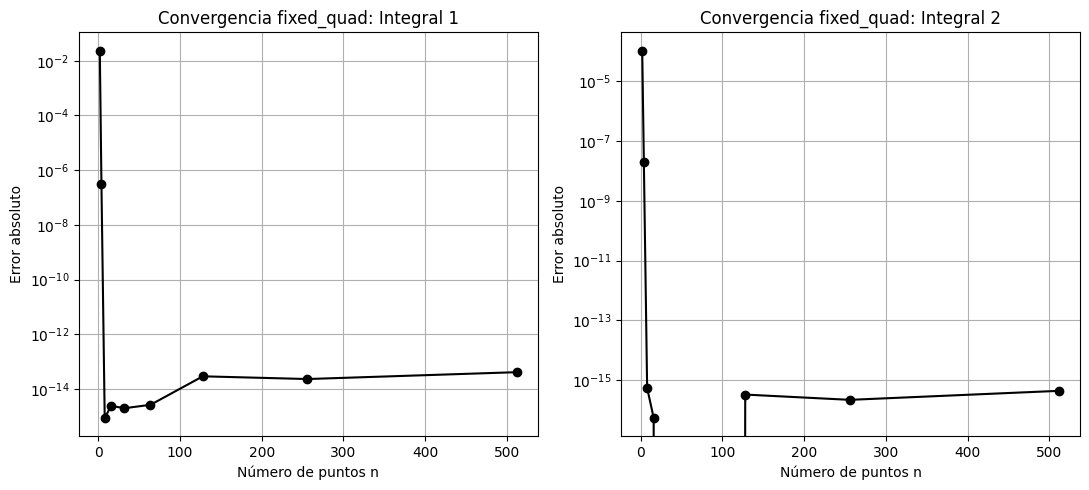

In [ ]:
# Funciones
f1 = lambda x: np.exp(3*x) * np.sin(x)
a1, b1 = 0, np.pi/4

f2 = lambda x: 1 / (x * np.log(x))
a2, b2 = np.e, 1 + np.e

# Valores exactos dados por quad
val_real1, _ = quad(f1, a1, b1)
val_real2, _ = quad(f2, a2, b2)

# Valores n
valores_n = [2**i for i in range(1, 10)]
# Valores h para cada integral
h_valores1 = (b1 - a1) / np.array(valores_n)
h_valores2 = (b2 - a2) / np.array(valores_n)

# Listas de cada error
error_trap1 = []
error_simp1 = []
error_fixed1 = []

error_trap2 = []
error_simp2 = []
error_fixed2 = []

for n in valores_n:
  # Puntos de la función
  x1 = np.linspace(a1, b1, n + 1)
  y1 = f1(x1)

  x2 = np.linspace(a2, b2, n + 1)
  y2 = f2(x2)

  # Aproximación con Trapezoidal
  trap1 = trapezoid(y1, x=x1)
  trap2 = trapezoid(y2, x=x2)

  # Aproximación con Simpson
  simp1 = simpson(y1, x=x1)
  simp2 = simpson(y2, x=x2)

  # Aproximación con fixed_quad (con n puntos)
  fixed1, _ = fixed_quad(f1, a1, b1, n=n)
  fixed2, _ = fixed_quad(f2, a2, b2, n=n)

  # Calculamos errores absolutos
  error_trap1.append(abs(trap1 - val_real1))
  error_simp1.append(abs(simp1 - val_real1))
  error_fixed1.append(abs(fixed1 - val_real1))

  error_trap2.append(abs(trap2 - val_real2))
  error_simp2.append(abs(simp2 - val_real2))
  error_fixed2.append(abs(fixed2 - val_real2))

# Graficar errores con métodos trapezoidal y simpson
plt.figure(figsize=(10, 5))
# Integral 1
plt.subplot(1, 2, 1)
plt.loglog(h_valores1, error_trap1, 'o-', label='Método trapezoidal', color='red')
plt.loglog(h_valores1, error_simp1, '*-', label='Método simpson', color='purple')
plt.xlabel('Pasos de tamaño h')
plt.ylabel('Error absoluto')
plt.title('Error absoluto integral 1')
plt.legend()
plt.grid()

# Integral 2
plt.subplot(1, 2, 2)
plt.loglog(h_valores2, error_trap2, 'o-', label='Método trapezoidal', color='red')
plt.loglog(h_valores2, error_simp2, '*-', label='Método simpson', color='purple')
plt.xlabel('Pasos de tamaño h')
plt.ylabel('Error absoluto')
plt.title('Error absoluto integral 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Graficar convergencia de fixed_quad
plt.figure(figsize=(11, 5))
# Integral 1
plt.subplot(1, 2, 1)
plt.semilogy(valores_n, error_fixed1, 'o-', color='black')
plt.xlabel('Número de puntos n')
plt.ylabel('Error absoluto')
plt.title('Convergencia fixed_quad: Integral 1')
plt.grid()

# Integral 2
plt.subplot(1, 2, 2)
plt.semilogy(valores_n, error_fixed2, 'o-', color='black')
plt.xlabel('Número de puntos n')
plt.ylabel('Error absoluto')
plt.title('Convergencia fixed_quad: Integral 2')
plt.grid()

plt.tight_layout()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [ ]:
# Resolviendo la integral con quad
def integral_interna(y, x):
  integrando = lambda z: (1 / y) * (np.sin(z/y))
  resultado, _ = quad(integrando, 0, x*y)
  return resultado

def integral_intermedia(x):
  integrando = lambda y: integral_interna(y, x)
  resultado, _ = quad(integrando, 0, x)
  return resultado

resultado_triple_quad, _ = quad(integral_intermedia, 0, np.pi)
print(f"Resultado con quad: {resultado_triple_quad}")

# Resolviendo la integral con tplquad
from scipy.integrate import tplquad
f_triple = lambda z, y, x: (1 / y) * (np.sin(z/y))
resultado_tplquad, _ = tplquad(f_triple, 0, np.pi,
                               lambda x: 0, lambda x: x,
                               lambda x, y: 0, lambda x, y: x*y)
print(f"Resultado con tlquad: {resultado_tplquad}")


Resultado con quad: 6.934802200544679
Resultado con tlquad: 6.934802200544679


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
from scipy.special import roots_legendre

def gauss_quad_standard(func, a, b, n):
    '''
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Entradas:
    - func : la función a integrar.
    - a : límite inferior.
    - b : límite superior.
    - n : número de puntos para la cuadratura (grado del polinomio de Legendre).

    Retorna:
    - integral : aproximación de la integral.
    '''
    x, w = roots_legendre(n)
    t = 0.5 * (b - a) * x + 0.5 * (a + b)
    integral = 0.5 * (b - a) * np.sum(w * np.array([func(ti) for ti in t]))
    return integral

# Usando la integral del punto 2
def triple_integral_gauss(n=20):
    def integral_interna(y, x):
        integrando = lambda z: (1 / y) * np.sin(z/y)
        return gauss_quad_standard(integrando, 0, x * y, n)

    def integral_intermedia(x):
        integrand = lambda y: integral_interna(y, x)
        return gauss_quad_standard(integrand, 0, x, n)

    def integral_externa():
        integrand = lambda x: integral_intermedia(x)
        return gauss_quad_standard(integrand, 0, np.pi, n)

    return integral_externa()

# Aplicar la función
resultado = triple_integral_gauss(n)
print(f"Resultado con a función gauss_quad_standard: {resultado}")


Resultado con a función gauss_quad_standard: 6.934802200544673


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
# Tolerancia
eps = 1e-5

# Integral 1
a1 = 1e-8  # valor cercano a 0 (lím a->0) para evitar división por 0
b1 = np.sqrt(np.pi / 2)
f1 = lambda t: (2 * t) / np.sqrt(np.tan(t**2)) # Cambio de varaible para evitar la división por cero (explicación abajo)

# Métodos
t_valores = np.linspace(a1, b1, n)
y_valores = f1(t_valores)
I1_trap = trapezoid(y_valores, t_valores) # Trapezoidal
I1_simp = simpson(y_valores, t_valores) # Simpson
I1_gauss, _ = fixed_quad(f1, a1, b1, n=500) # Cuadratura Gaussiana

# Comprobación con quad
I1_quad, _ = quad(f1, a1, b1, epsabs=eps)

# Integral 2
a2, b2 = 1, 100
f2 = lambda x: np.cos(x) / x**3

# Métodos
x_valores = np.linspace(a2, b2, n)
y_valores = f2(x_valores)
I2_trap = trapezoid(y_valores, x_valores)
I2_simp = simpson(y_valores, x_valores)
I2_gauss, _ = fixed_quad(f2, a2, b2, n=500)

# Comprobación con quad
I2_quad, _ = quad(f2, a2, b2, epsabs=eps)

# Integral 3
a3, b3 = 0, np.sin(np.pi / 4)
f3 = lambda y: (np.pi/4 - np.arcsin(y)) / np.sqrt(1 - y**2)

# Métodos
y_valores = np.linspace(a3, b3, n)
f_valores = f3(y_valores)
I3_trap = trapezoid(f_valores, y_valores)
I3_simp = simpson(f_valores, y_valores)
I3_gauss, _ = fixed_quad(f3, a3, b3, n=500)

# Comprobación con quad
I3_quad, _ = quad(f3, a3, b3, epsabs=eps)

# Resultados
data = {
    'Método': ['Trapezoidal', 'Simpson', 'Cuadratura Gauss', 'Comprobación con quad'],
    'Integral 1': [I1_trap, I1_simp, I1_gauss, I1_quad],
    'Integral 2': [I2_trap, I2_simp, I2_gauss, I2_quad],
    'Integral 3': [I3_trap, I3_simp, I3_gauss, I3_quad]}

df = pd.DataFrame(data)
df = df.round(10)
print(df)

                  Método  Integral 1  Integral 2  Integral 3
0            Trapezoidal    2.221438    0.018198    0.308425
1                Simpson    2.221440    0.018117    0.308425
2       Cuadratura Gauss    2.221441    0.018117    0.308425
3  Comprobación con quad    2.221441    0.018117    0.308425


## Explicación cabio de variable:

Hice el cambio de variable $x = t^2$ --> $dx = 2t dt$ en la integral #1.

Como se puede observar, el límite inferior es 0, haciendo que exista una división por 0, cosa no permitida.

Por esta razón, a = 1e-8; así evitamos un error.

Cuando $x = 0$, $t = 0$, y cuando $x = \pi/2$, $t = \sqrt{\pi/2}$

De este modo, la integral es evaluada en un valor cercano a 0, pero no exactamente 0.